In [9]:
# library import
import pandas as pd
import folium
import matplotlib.pyplot as plt 

In [10]:
# import the csv file
df = pd.read_csv('GIS.csv')

In [11]:
df

,name,description,latitude,longitude,colour
0,宮島,行ってみたい観光スポット,34.392846,132.452266,orange
1,ホテルエスプル広島平和公園,Sakiが前泊するホテル,34.389116,132.456216,orange
2,広島現代美術館,"Saki,Misuzu,Riria,Karenが金曜日に行く場所",34.386263,132.473582,green
3,広島テレビ,前泊メンバーでインタビュー,34.400276,132.475669,green
4,原爆ドーム,資料館拝観、Dialogue,34.395638,132.453603,green


In [12]:
# size of the data (rows, columns)
df.shape

(5, 5)

In [13]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         5 non-null      object 
 1   description  5 non-null      object 
 2   latitude     5 non-null      float64
 3   longitude    5 non-null      float64
 4   colour       5 non-null      object 
dtypes: float64(2), object(3)
memory usage: 332.0+ bytes


In [14]:
# list of columns
df.columns.to_list()

['name', 'description', 'latitude', 'longitude', 'colour']

In [15]:
# get values for a single column
df['longitude']

0    132.452266
1    132.456216
2    132.473582
3    132.475669
4    132.453603
Name: longitude, dtype: float64

In [17]:
# put those values in a list
df['latitude'].to_list()

[34.39284603, 34.38911573, 34.38626261, 34.400276, 34.3956379]

<Axes: >

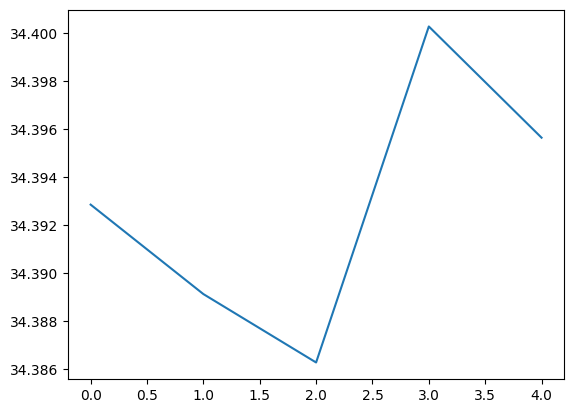

In [18]:
# line chart
df['latitude'].plot()

<Axes: >

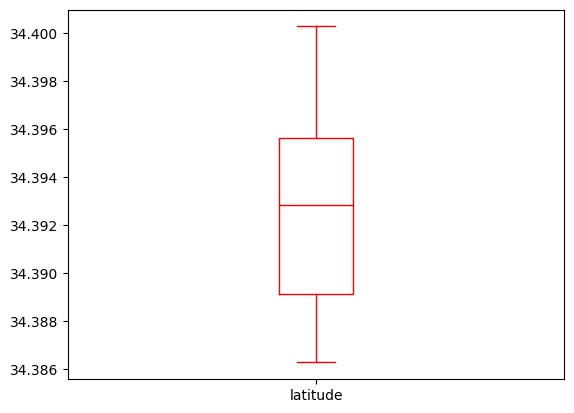

In [19]:
# boxplot 箱ヒゲ図
df['latitude'].plot.box(color='red')

<Axes: >

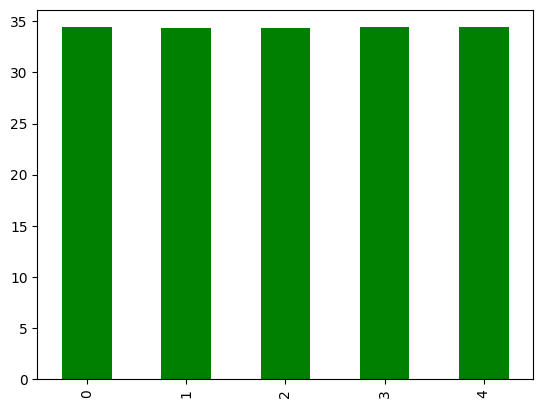

In [20]:
# bar graph
df['latitude'].plot.bar(color='green')

<Axes: xlabel='longitude', ylabel='latitude'>

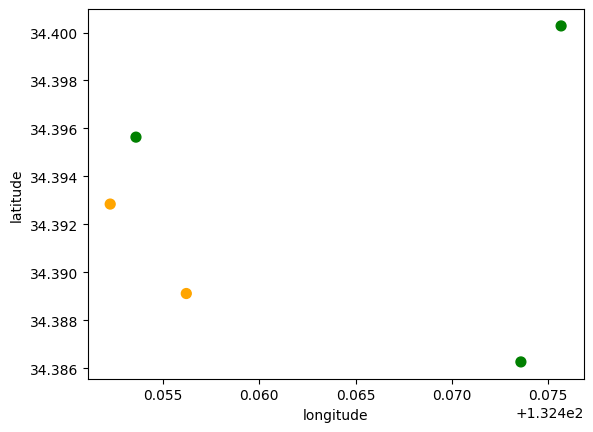

In [22]:
df.plot.scatter(x='longitude',y='latitude',c='colour',s=50)

In [23]:
# summary stats
df['latitude'].describe()

count     5.000000
mean     34.392828
std       0.005483
min      34.386263
25%      34.389116
50%      34.392846
75%      34.395638
max      34.400276
Name: latitude, dtype: float64

In [24]:
# summary stats
df['longitude'].describe()

count      5.000000
mean     132.462267
std        0.011395
min      132.452266
25%      132.453603
50%      132.456216
75%      132.473582
max      132.475669
Name: longitude, dtype: float64

In [25]:
df['latitude'].mean()

34.392827654

In [26]:
df['latitude'].median()

34.39284603

In [27]:
# complete the following code:
center_lat = df['latitude'].mean()
center_lon =df['longitude'].mean()

In [28]:
# loop through your data
for index, row in df.iterrows():
    print(row['name'])

宮島
ホテルエスプル広島平和公園
広島現代美術館
広島テレビ
原爆ドーム


In [29]:
# loop and output multiple column values
for index, row in df.iterrows():
    print(row['name'],row['latitude'],row['longitude'])

宮島 34.39284603 132.4522656
ホテルエスプル広島平和公園 34.38911573 132.4562155
広島現代美術館 34.38626261 132.4735821
広島テレビ 34.400276 132.475669
原爆ドーム 34.3956379 132.4536027


In [36]:
# make the map
m = folium.Map(location=[center_lat,center_lon], zoom_start=13.5)

# df をループしてマーカーを作る
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, 
                  popup='<div style="width:350px">'+row['description']+'</div>', 
                  tooltip=row['name'],
                  icon=folium.Icon(color=row['colour']
                )).add_to(m)

# show the map
m

In [38]:
# make the map
m = folium.Map(location=[center_lat,center_lon], 
               zoom_start=13.5,
               attr = '国土地理院')

# add basemaps
folium.TileLayer(name='2007年以降',tiles='https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1987年～1990年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo4/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1984年～1986年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo3/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1979年～1983年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo2/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1974年～1978年',tiles='https://cyberjapandata.gsi.go.jp/xyz/gazo1/{z}/{x}/{y}.jpg',attr='国土地理院').add_to(m)
folium.TileLayer(name='1961年～1969年',tiles='https://cyberjapandata.gsi.go.jp/xyz/ort_old10/{z}/{x}/{y}.png',attr='国土地理院').add_to(m)

# basemapが選べるボタンをマップに足す
folium.LayerControl().add_to(m)

# add points
for index, row in df.iterrows():
    latlon = [row['latitude'],row['longitude']]
    folium.Marker(latlon, 
                  popup='<div style="width:350px">'+row['description']+'</div>', 
                  tooltip=row['name'],
                  icon=folium.Icon(color=row['colour']
                )).add_to(m)
# show the map
m



In [39]:
m.save("map.html")